Classifying Cardiotocography (CTG) data to predict child and maternal mortality

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
# I using Google Colab
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving fetal_health.csv to fetal_health.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['fetal_health.csv']))
# Dataset is now stored in a Pandas Dataframe

df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,8.187629,70.445908,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,5.628247,38.955693,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,3.000000,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,4.600000,37.000000,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,7.400000,67.500000,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,10.800000,100.000000,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,50.700000,180.000000,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [ ]:
df.shape

(2126, 22)

In [ ]:
df.isnull().sum().sum()
#see have any null values in the data frame

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [ ]:
#exploratory  data analysis

EDA_df = df.copy()

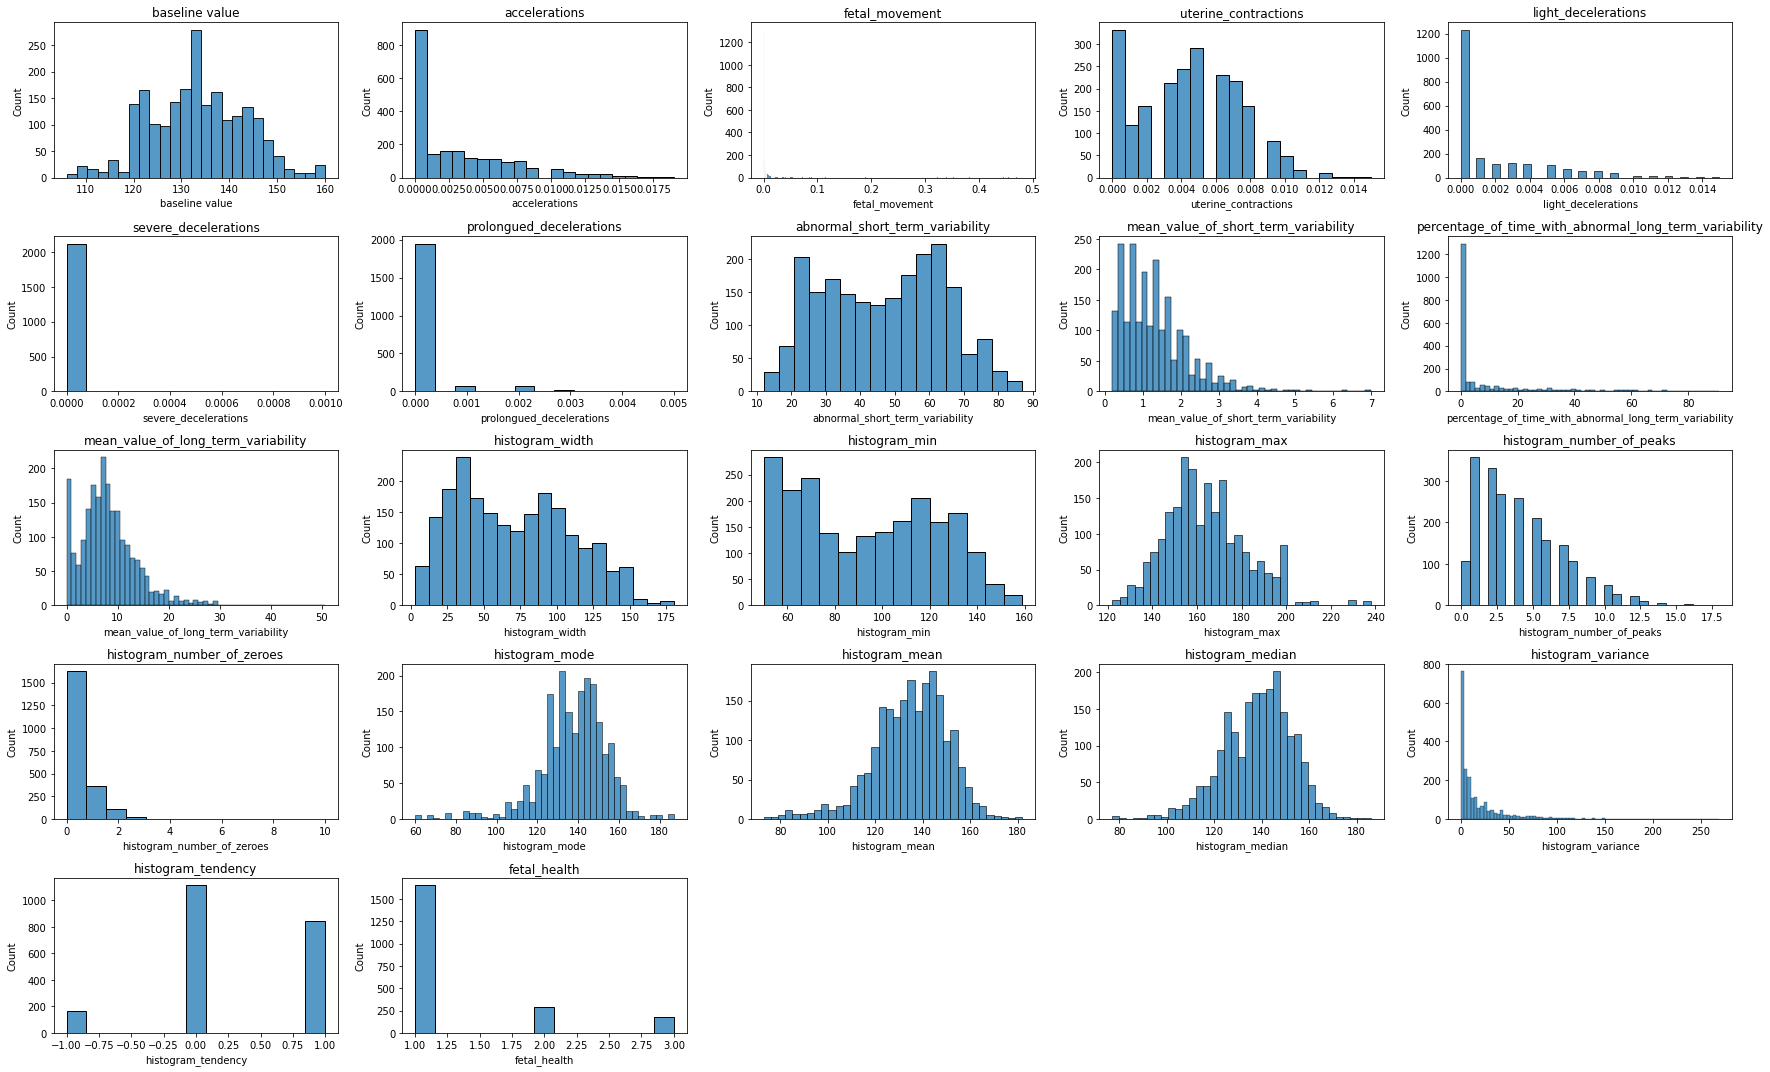

In [ ]:
plt.figure(figsize=(25,15))

for i, column in enumerate(EDA_df.columns):
    plt.subplot(5,5,i + 1)
    sns.histplot(data=EDA_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#plot out all the data into histogram

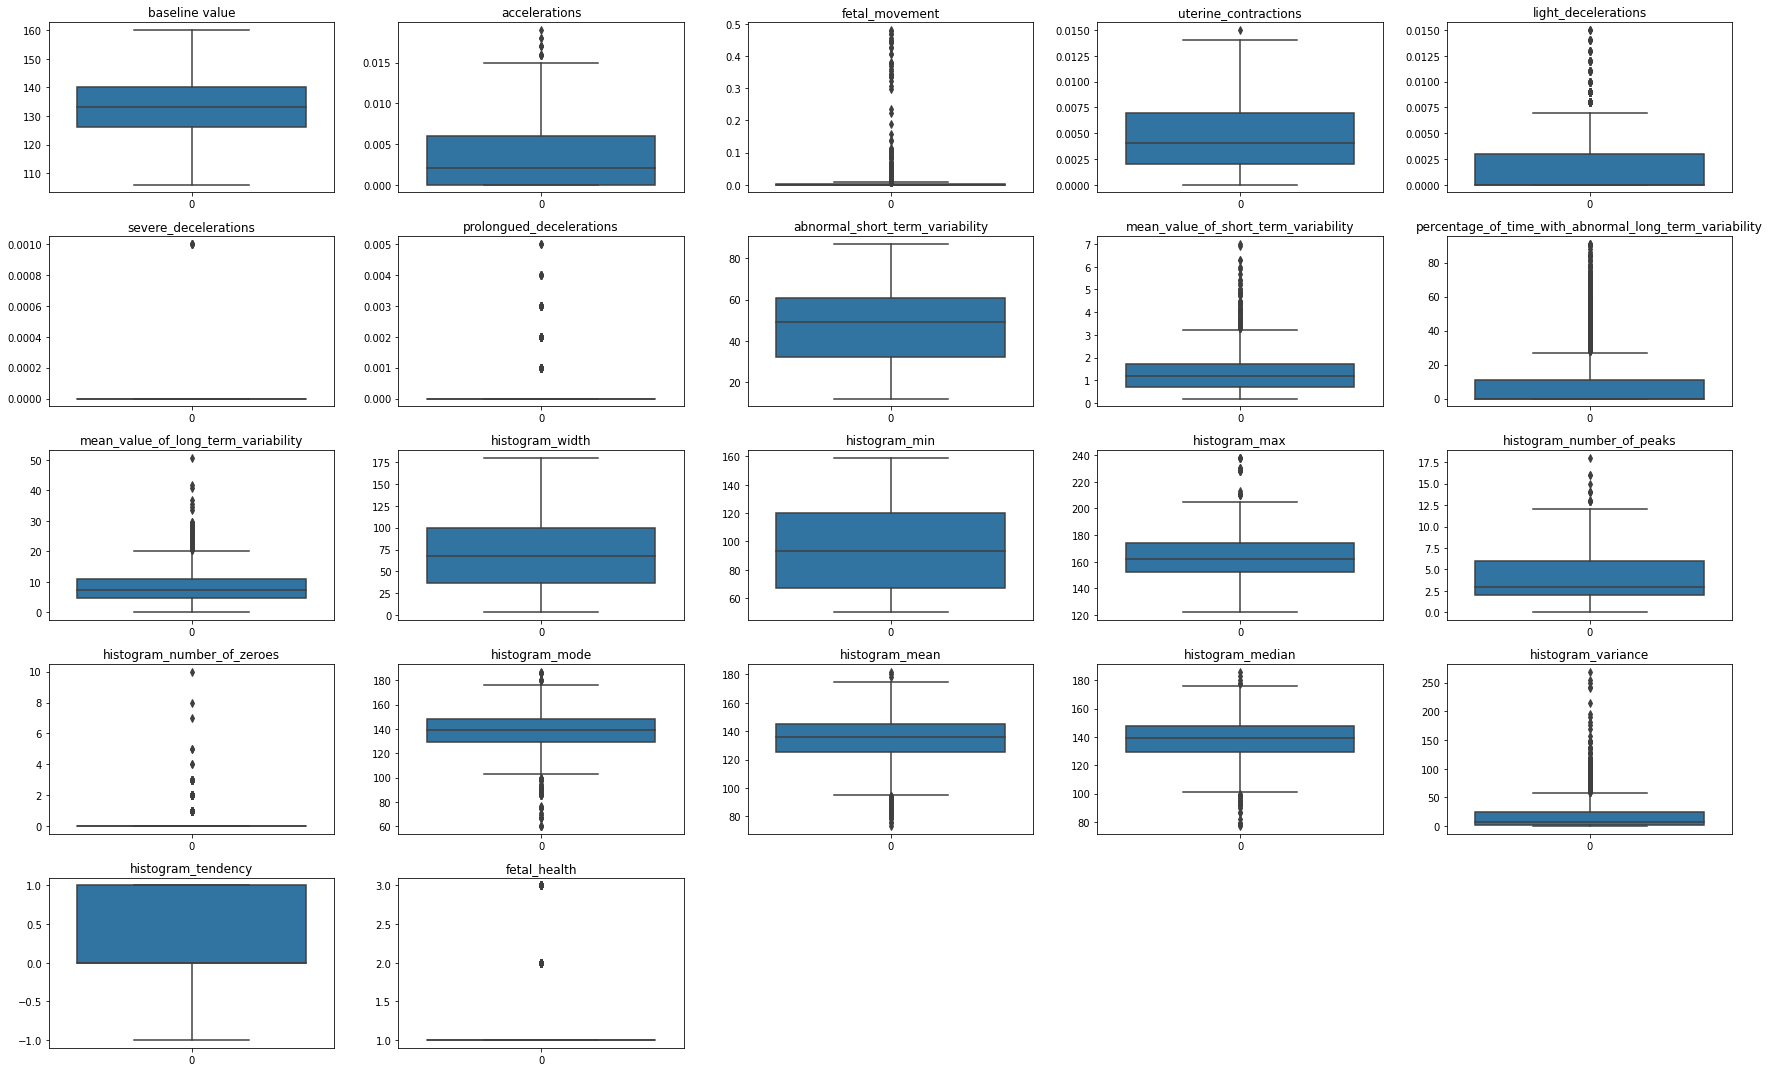

In [ ]:
plt.figure(figsize=(25,15))

for i, column in enumerate(EDA_df.columns):
    plt.subplot(5,5,i + 1)
    sns.boxplot(data=EDA_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

#plot all the data into boxplot

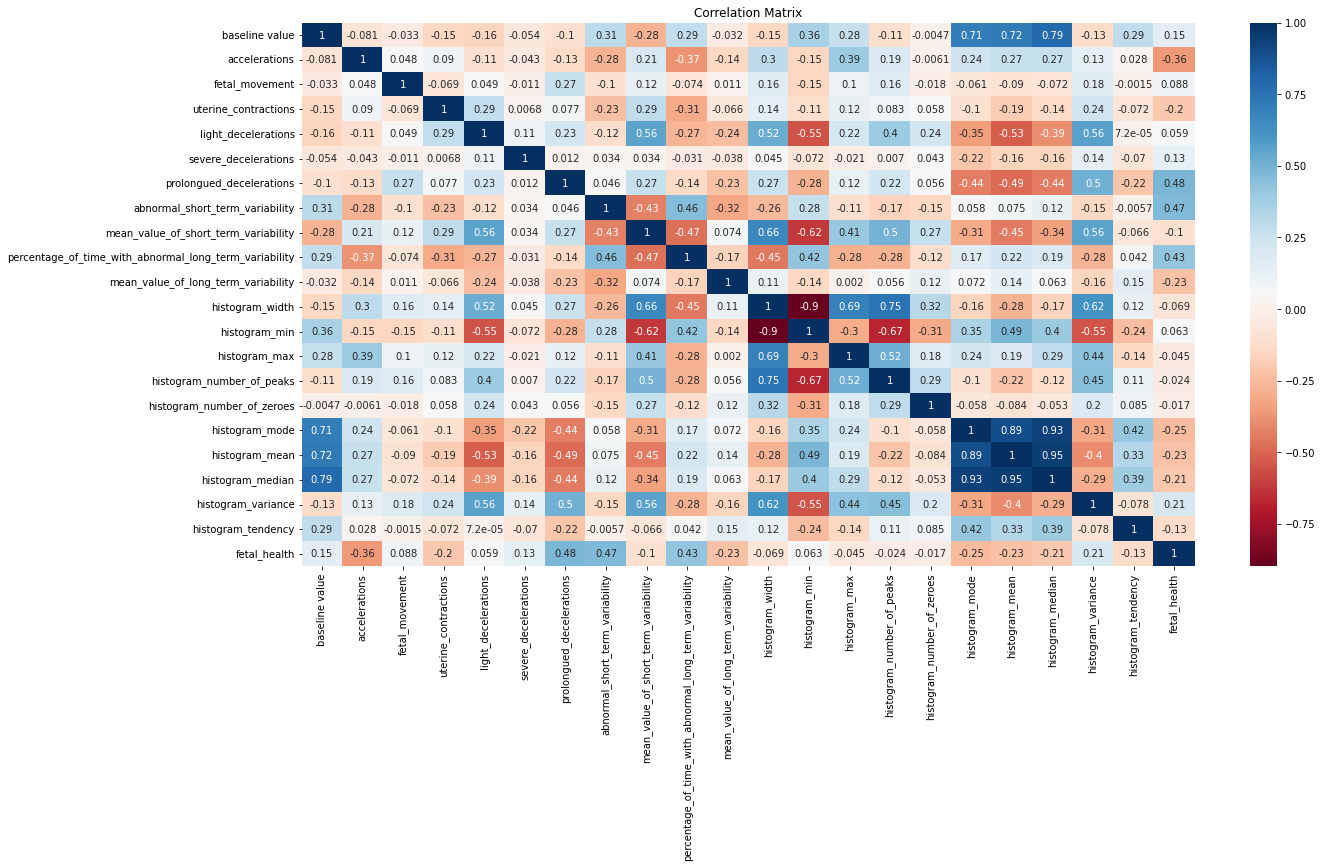

In [ ]:
corr = EDA_df.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True,mask=None,cmap='RdBu')
plt.title("Correlation Matrix")
plt.show()

#plotting out the correlation matrix

In [ ]:
EDA_df.fetal_health.value_counts()
# checking the fetal health count

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

#define labels: "Normal"= 1.0,"Suspect"=2.0, "Pathological"=3.0

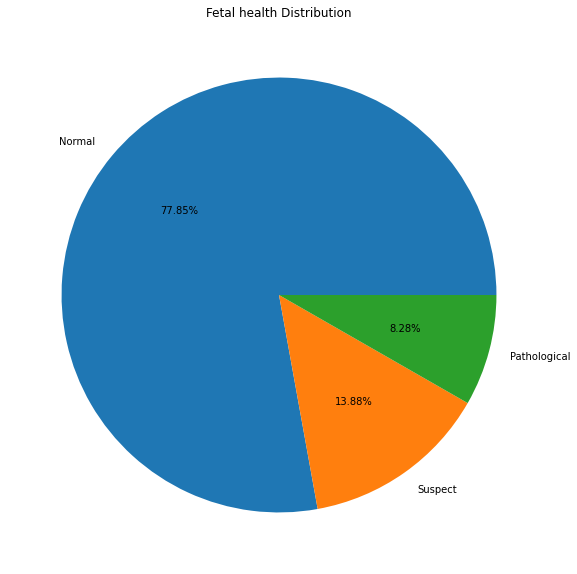

In [ ]:
plt.figure(figsize=(10,10))

plt.pie(
    EDA_df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels =['Normal','Suspect','Pathological']
)
plt.title("Fetal health Distribution")
plt.show()

#plot to Pie chart

Data processing

In [ ]:
# Import libraries required
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
def preprocess(df):
    df = df.copy()
    
    # rename target values
    df['fetal_health'] = df['fetal_health'].replace( { 1.0 :"Normal",2.0:"Suspect",3.0:"Pathological"})
    
    # Split df into X and y
   
    y= df['fetal_health']
    X = df.drop('fetal_health', axis=1)
    
    #train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    #Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train= pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test=pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [ ]:
X_train, X_test, y_train, y_test = preprocess(df)

In [ ]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1834,0.664277,-0.828366,-0.184667,-0.456717,1.715755,-0.064301,-0.271362,0.811014,0.075515,-0.535312,0.332950,0.895192,-1.032802,0.224744,1.347805,-0.458344,0.267676,-0.625026,0.329609,0.142408,1.102923
412,1.368813,-0.828366,-0.206453,-1.481467,-0.637303,-0.064301,-0.271362,0.753031,-1.066620,0.120251,-0.476671,-1.554375,1.688791,-0.565930,-1.379489,-0.458344,0.754361,0.916475,0.812299,-0.659341,-0.528904
986,-0.241555,1.237991,-0.206453,1.251200,-0.637303,-0.064301,-0.271362,-1.334364,-0.038698,-0.535312,-0.152823,-0.729258,0.781593,-0.283547,-0.697666,-0.458344,-0.097337,0.209954,0.053786,-0.485048,-0.528904
34,-1.348683,1.496285,1.645341,-0.798300,0.034999,-0.064301,-0.271362,-1.102431,2.131359,-0.535312,0.764748,1.488245,-1.368801,0.958942,1.688716,0.911049,-0.523186,-0.625026,-0.773684,0.212125,-0.528904
2068,-0.342203,1.496285,-0.184667,-0.798300,-0.637303,-0.064301,-0.271362,1.100930,-0.152912,-0.535312,-1.286293,-0.651903,0.613594,-0.396500,0.665981,-0.458344,-0.036501,0.081496,-0.015170,-0.589624,-0.528904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,0.865573,2.529463,-0.206453,1.251200,-0.637303,-0.064301,-0.271362,-0.348650,-0.381339,-0.535312,-1.340267,-0.677688,1.352792,0.789512,-0.015842,-0.458344,0.693525,1.109163,0.950211,-0.485048,-0.528904
2115,0.664277,-0.828366,-0.206453,0.568033,-0.637303,-0.064301,-0.271362,2.086645,-1.295047,2.086939,-0.494663,-1.296526,1.285592,-0.678884,-0.697666,-0.458344,0.450183,0.659558,0.536476,-0.659341,-0.528904
19,-0.342203,0.463107,10.011089,0.226450,0.707301,-0.064301,1.449963,-1.044448,0.418156,-0.535312,-0.062865,1.075686,-0.965602,0.733035,0.665981,0.911049,-0.279843,-0.368109,-0.359949,0.281842,-0.528904
17,-0.241555,-0.311777,8.137510,-0.456717,1.043453,-0.064301,3.171288,-1.682263,1.217651,-0.535312,1.034622,0.946761,-0.898402,0.563605,0.325069,-0.458344,-0.219008,-0.625026,-0.428905,0.909298,-0.528904


In [ ]:
X_train.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
count,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03,1.700000e+03
mean,1.655049e-16,2.191711e-16,-3.753533e-16,-2.978010e-17,4.494444e-16,1.490001e-15,1.723458e-16,1.989258e-16,6.125819e-17,4.963350e-18,1.839705e-16,1.671865e-17,5.577238e-17,-6.014797e-16,1.682314e-16,-7.804215e-17,2.264794e-16,5.502951e-17,-7.693090e-17,1.410636e-17,-7.603069e-16
std,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00,1.000294e+00
min,-2.748259e+00,-8.259396e-01,-2.088035e-01,-1.498811e+00,-6.464269e-01,-5.431254e-02,-2.778519e-01,-2.024267e+00,-1.284638e+00,-5.340725e-01,-1.451798e+00,-1.744851e+00,-1.464414e+00,-2.346170e+00,-1.399106e+00,-4.527822e-01,-4.692944e+00,-3.894755e+00,-4.214880e+00,-6.485847e-01,-2.158579e+00
25%,-7.243289e-01,-8.259396e-01,-2.088035e-01,-8.234022e-01,-6.464269e-01,-5.431254e-02,-2.778519e-01,-8.671540e-01,-7.225923e-01,-5.340725e-01,-6.314251e-01,-8.716552e-01,-8.882105e-01,-6.761116e-01,-7.199282e-01,-4.527822e-01,-4.997194e-01,-5.915818e-01,-6.854503e-01,-5.807933e-01,-5.240203e-01
50%,-1.595333e-02,-3.094425e-01,-2.088035e-01,1.897103e-01,-6.464269e-01,-5.431254e-02,-2.778519e-01,1.163919e-01,-1.605467e-01,-5.340725e-01,-1.320675e-01,-7.550578e-02,-6.958303e-03,-1.194255e-01,-4.075065e-02,-4.527822e-01,1.079943e-01,1.071663e-01,7.579929e-02,-3.943668e-01,-5.240203e-01
75%,6.924222e-01,7.235517e-01,-1.501670e-01,8.651186e-01,3.388622e-01,-5.431254e-02,-2.778519e-01,8.106596e-01,4.296012e-01,7.927613e-02,4.564611e-01,7.463259e-01,9.081882e-01,5.625149e-01,6.384269e-01,-4.527822e-01,6.549366e-01,6.788693e-01,6.986399e-01,1.988084e-01,1.110538e+00
max,2.716352e+00,3.822534e+00,9.192584e+00,3.566752e+00,4.280019e+00,1.841195e+01,8.038139e+00,2.314906e+00,6.359183e+00,4.539994e+00,7.590141e+00,2.800905e+00,2.230066e+00,4.111389e+00,4.034315e+00,1.341622e+01,3.025020e+00,2.902159e+00,3.120798e+00,8.469366e+00,1.110538e+00


In [ ]:
y_train

1834     Normal
412     Suspect
986      Normal
34       Normal
2068     Normal
         ...   
1415     Normal
2115     Normal
19       Normal
17      Suspect
1379     Normal
Name: fetal_health, Length: 1700, dtype: object

Training

In [ ]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   Gradient Boosting": GradientBoostingClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                   K-Nearest Neighbors": KNeighborsClassifier()
  
   
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   Gradient Boosting trained.
                         Decision Tree trained.
                         Random Forest trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                   K-Nearest Neighbors trained.


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Results

In [ ]:
for name, model in models.items():
    print(name + ":{:.2f}%)".format(model.score(X_test,y_test)* 100))

                   Logistic Regression:88.97%)
                   Gradient Boosting:95.31%)
                         Decision Tree:91.78%)
                         Random Forest:94.37%)
Support Vector Machine (Linear Kernel):89.67%)
   Support Vector Machine (RBF Kernel):91.31%)
                   K-Nearest Neighbors:91.08%)
